In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('kc_house_data.csv')
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
df.drop(['id'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
floors = df['floors'].value_counts().to_frame()
floors

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df['waterfront'].head()



0    0
1    0
2    0
3    0
4    0
Name: waterfront, dtype: int64

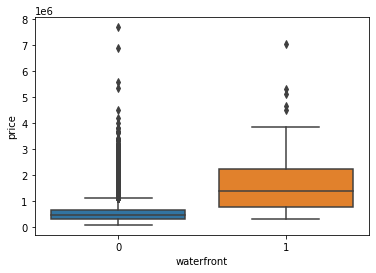

In [14]:
sns.boxplot(df['waterfront'], df['price'])

(0.0, 8081250.0)

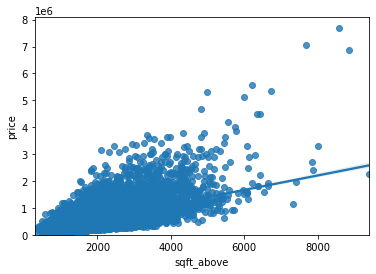

In [16]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.ylim(0,)

In [17]:
from sklearn.linear_model import LinearRegression


In [20]:
lm = LinearRegression()
lm.fit(df[['sqft_living']], df['price'])
lm.predict(df[['sqft_living']])

array([287555.06702451, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [22]:
lm.score(df[['sqft_living']], df['price'])


0.49285321790379316

In [23]:
from sklearn.preprocessing import PolynomialFeatures
z = df[["floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"]]
pr = PolynomialFeatures()
pr.fit_transform(z)


array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.9000e+01, 8.2600e+03,
        1.3924e+06],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 4.9000e+01, 1.7990e+04,
        6.6049e+06],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.6000e+01, 4.6200e+03,
        5.9290e+05],
       ...,
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 4.9000e+01, 7.1400e+03,
        1.0404e+06],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 6.4000e+01, 1.2800e+04,
        2.5600e+06],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 4.9000e+01, 7.1400e+03,
        1.0404e+06]])

In [24]:
y = df['price']
lm.fit(pr.fit_transform(z), y)
lm.score(pr.fit_transform(z), y)


0.7513467656306851

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input = [
     ('scale', StandardScaler()),
     ('polynomial', PolynomialFeatures()),
     ('model', LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(z, y)
pipe.score(z, y)

0.7513318737214145

In [31]:
from sklearn.linear_model import Ridge
# from sklearn.model_selection import train_test_split
# x = df.drop('price', axis=1)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
RM = Ridge(alpha=0.1)
RM.fit(z, y)
RM.score(z, y)

0.6577150926380138

In [38]:
from sklearn.model_selection import train_test_split
# x = df.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.30, random_state=0)
z_train = PolynomialFeatures(degree=2).fit_transform(x_train)
z_test = PolynomialFeatures(degree=2).fit_transform(x_test)

RM = Ridge(alpha=0.1)
RM.fit(z_train, y_train)

# y_hat = RM.predict(z_test)
RM.score(z_test, y_test)


0.7307388991540538

In [ ]:
df = pd.read_csv()